<a href="https://colab.research.google.com/github/BI-DS/ELE-3909/blob/master/lecture6/news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from nltk.tokenize import word_tokenize
import numpy as np
import re
import nltk
import os
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Transforming news articles to TF-IDF embeddings

First define a function to clean-up the raw text

In [91]:
def clean_text(text):
    if type(text) == float:
        return ""
    stopwords = nltk.corpus.stopwords.words("english")
    normalMap = {'í':'i', 'ó':'o', 'á':'a', 'é':'e', 'ú':'u', 'ñ':'n'}
    normalize = str.maketrans(normalMap)
    temp = text.lower()
    temp = temp.translate(normalize)

    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

Download the txt file from github ...

In [92]:
!wget -P . https://raw.githubusercontent.com/BI-DS/ELE-3909/master/lecture6/news_articles.txt

--2023-10-02 13:02:34--  https://raw.githubusercontent.com/BI-DS/ELE-3909/master/lecture6/news_articles.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25337978 (24M) [text/plain]
Saving to: ‘./news_articles.txt.1’

news_articles.txt.1 100%[===================>]  24.16M  50.1MB/s    in 0.5s    

2023-10-02 13:02:37 (50.1 MB/s) - ‘./news_articles.txt.1’ saved [25337978/25337978]



Now we can clean each of the texts and create a corpus....

In [93]:
def text_to_corpus():
    with open("./news_articles.txt", "r") as infile:
        lines = infile.readlines()
    print('total no of lines {}'.format(len(lines)))

    lengths = []
    corpus  = []
    counter=0

    if os.path.exists('./clean_text.txt'):
      print('deleting old file...')
      os.system('rm ./clean_text.txt')

    with open("./clean_text.txt", "w") as x:
        for i, text in enumerate(lines):
            clean_content = clean_text(text)
            tokens = word_tokenize(clean_content)
            length = len(tokens)

            if length <= 100:
                counter+=1
                x.write(" ".join(tokens)+"\n")
                corpus.append(" ".join(tokens))
                lengths.append(length)

    print('{} news with length smaller than {}'.format(counter, np.max(lengths)))
    print('done!')
    x.close()

    return corpus

In [94]:
corpus = text_to_corpus()

total no of lines 4551
deleting old file...
127 news with length smaller than 100
done!


## Calculate the TF-IDF using `sklearn`

In [106]:
max_features = 50
vectorizer  = TfidfVectorizer(max_features = max_features)
tf_idf = vectorizer.fit_transform(corpus)

In [107]:
embeddings = TSNE(n_components=2).fit_transform(tf_idf.toarray())

Plot the embeddings ...

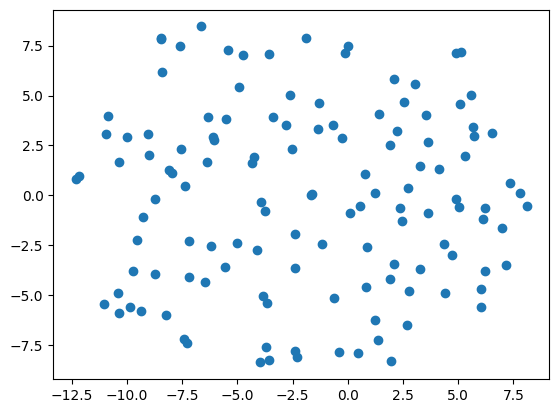

In [108]:
plt.scatter(embeddings[:,0],embeddings[:,1])
plt.show()